In [1]:
from langgraph.graph import StateGraph, START, MessagesState
from langchain_cerebras import ChatCerebras

from dotenv import load_dotenv

c:\Users\panka\anaconda3\envs\genai\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
load_dotenv()

True

In [4]:
model=ChatCerebras(model='llama-3.3-70b')

In [5]:
def call_model(state: MessagesState):
    response = model.invoke(state["messages"])
    return {"messages": [response]}

In [6]:
builder = StateGraph(MessagesState)
builder.add_node("call_model", call_model)
builder.add_edge(START, "call_model")

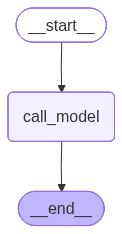

In [7]:
graph = builder.compile()
graph

In [8]:
graph.invoke({"messages": [{"role": "user", "content": "Hi! My name is Nitish."}]})

{'messages': [HumanMessage(content='Hi! My name is Nitish.', additional_kwargs={}, response_metadata={}, id='4e9d4de1-6966-4eb4-b024-7975a8e2dd2e'),
  AIMessage(content="Hello Nitish! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 43, 'total_tokens': 70, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'llama-3.3-70b', 'system_fingerprint': 'fp_2bc09d9bd1ce5f6aa987', 'id': 'chatcmpl-4142fa97-9cbe-4d52-9711-ef168ed10575', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bc63d-5592-79b2-81d4-753de1f7d0be-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 43, 'output_tokens': 27, 'total_tokens': 70, 'input_token_details': {'cache_read': 0}, 'output_token_details': {}})]}

In [9]:
graph.invoke({"messages": [{"role": "user", "content": "What is my name?"}]})

{'messages': [HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}, id='b8d684b1-1811-4b3e-b9b3-3b4c54bb4401'),
  AIMessage(content="I don't know your name. I'm a large language model, I don't have any information about you, including your name. I'm a text-based AI assistant, and our conversation just started, so I don't have any prior knowledge about you. If you'd like to share your name, I'd be happy to chat with you!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 71, 'prompt_tokens': 40, 'total_tokens': 111, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'llama-3.3-70b', 'system_fingerprint': 'fp_2bc09d9bd1ce5f6aa987', 'id': 'chatcmpl-b6694e14-b055-43a9-a245-d1ec7ca799c3', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bc63d-69ca-7851-8dd5-2ffa1ef5bc22-0', tool_calls=[], invalid_tool_calls=[], u

In [10]:
def call_model(state: MessagesState):
    response = model.invoke(state["messages"])
    return {"messages": [response]}

In [11]:
builder = StateGraph(MessagesState)
builder.add_node("call_model", call_model)
builder.add_edge(START, "call_model")

In [12]:
from langgraph.checkpoint.memory import InMemorySaver

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

In [13]:
config = {"configurable": {"thread_id": "thread-1"}}
config2 = {"configurable": {"thread_id": "thread-2"}}

In [14]:
graph.invoke({"messages": [{"role": "user", "content": "Hi! My name is Nitish."}]}, config)

{'messages': [HumanMessage(content='Hi! My name is Nitish.', additional_kwargs={}, response_metadata={}, id='9597522a-5bda-4022-99ee-17fb6c4060fc'),
  AIMessage(content="Hello Nitish! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 43, 'total_tokens': 70, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'llama-3.3-70b', 'system_fingerprint': 'fp_2bc09d9bd1ce5f6aa987', 'id': 'chatcmpl-607f70fd-5e63-46d6-8bfe-222c6cff91ac', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bc63d-998d-72b2-aa81-f94acf2ff750-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 43, 'output_tokens': 27, 'total_tokens': 70, 'input_token_details': {'cache_read': 0}, 'output_token_details': {}})]}

In [15]:
graph.invoke({"messages": [{"role": "user", "content": "What is my name?"}]}, config2)

{'messages': [HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}, id='fc50acd2-a18e-4437-a4cf-1bef7fdc3b83'),
  AIMessage(content="I don't know your name. I'm a large language model, I don't have any information about you, including your name. Our conversation just started, and I don't retain any personal data about users. If you'd like to share your name, I'd be happy to chat with you and use it in our conversation.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 68, 'prompt_tokens': 40, 'total_tokens': 108, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'llama-3.3-70b', 'system_fingerprint': 'fp_2bc09d9bd1ce5f6aa987', 'id': 'chatcmpl-160d5f2c-b7e6-45b3-86f7-1b9d41e11b83', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bc63d-9b5c-7243-8113-4e3b1e65e8a2-0', tool_calls=[], invalid_tool_calls=[], us

In [16]:
snap = graph.get_state(config)
vals = snap.values
for m in vals.get("messages", []):
        print("-", type(m).__name__, ":", m.content)

- HumanMessage : Hi! My name is Nitish.
- AIMessage : Hello Nitish! It's nice to meet you. Is there something I can help you with or would you like to chat?
